# **covid-19-in-South-Korea**

We will use [Data Science for COVID-19 dataset](https://www.kaggle.com/kimjihoo/coronavirusdataset) provided by DS4C at Kaggle.

## **List of Files**

*Encoding*: UTF-8

*   **Case.csv** (Data of COVID-19 infection cases)
*   **PatientInfo.csv** (Epidemiological data of COVID-19 patients)
*   **PatientRoute.csv** (Route data of COVID-19 patients)
*   **Region.csv** (Location and statistical data of the regions)
*   **SearchTrend.csv** (Trend data of the keywords searched in NAVER which is one of the largest portals)
*   **SeoulFloating.csv** (Data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub))
*   **Time.csv** (Time series data of COVID-19 status)
*   **TimeAge.csv** (Time series data of COVID-19 status in terms of the age)
*   **TimeGender.csv** (Time series data of COVID-19 status in terms of gender)
*   **TimeProvince.csv** (Time series data of COVID-19 status in terms of the Province)
*   **Weather.csv** (Data of the weather in the regions)

### **Setting Directory Path**

In [0]:
DIR_PATH = '/content/drive/My Drive/Colab Notebooks/data/kr-corona-dataset/'

### **Setting Environment**

In [0]:
%config InlineBackend.figure_format = 'retina'

import os, copy, time, random;
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

sns.set_style('darkgrid')
sns.set_palette('husl')

## **By Gender**

In [58]:
# Gender
gender = pd.read_csv(os.path.join(DIR_PATH, 'TimeGender.csv'))
gender.head(2)

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9


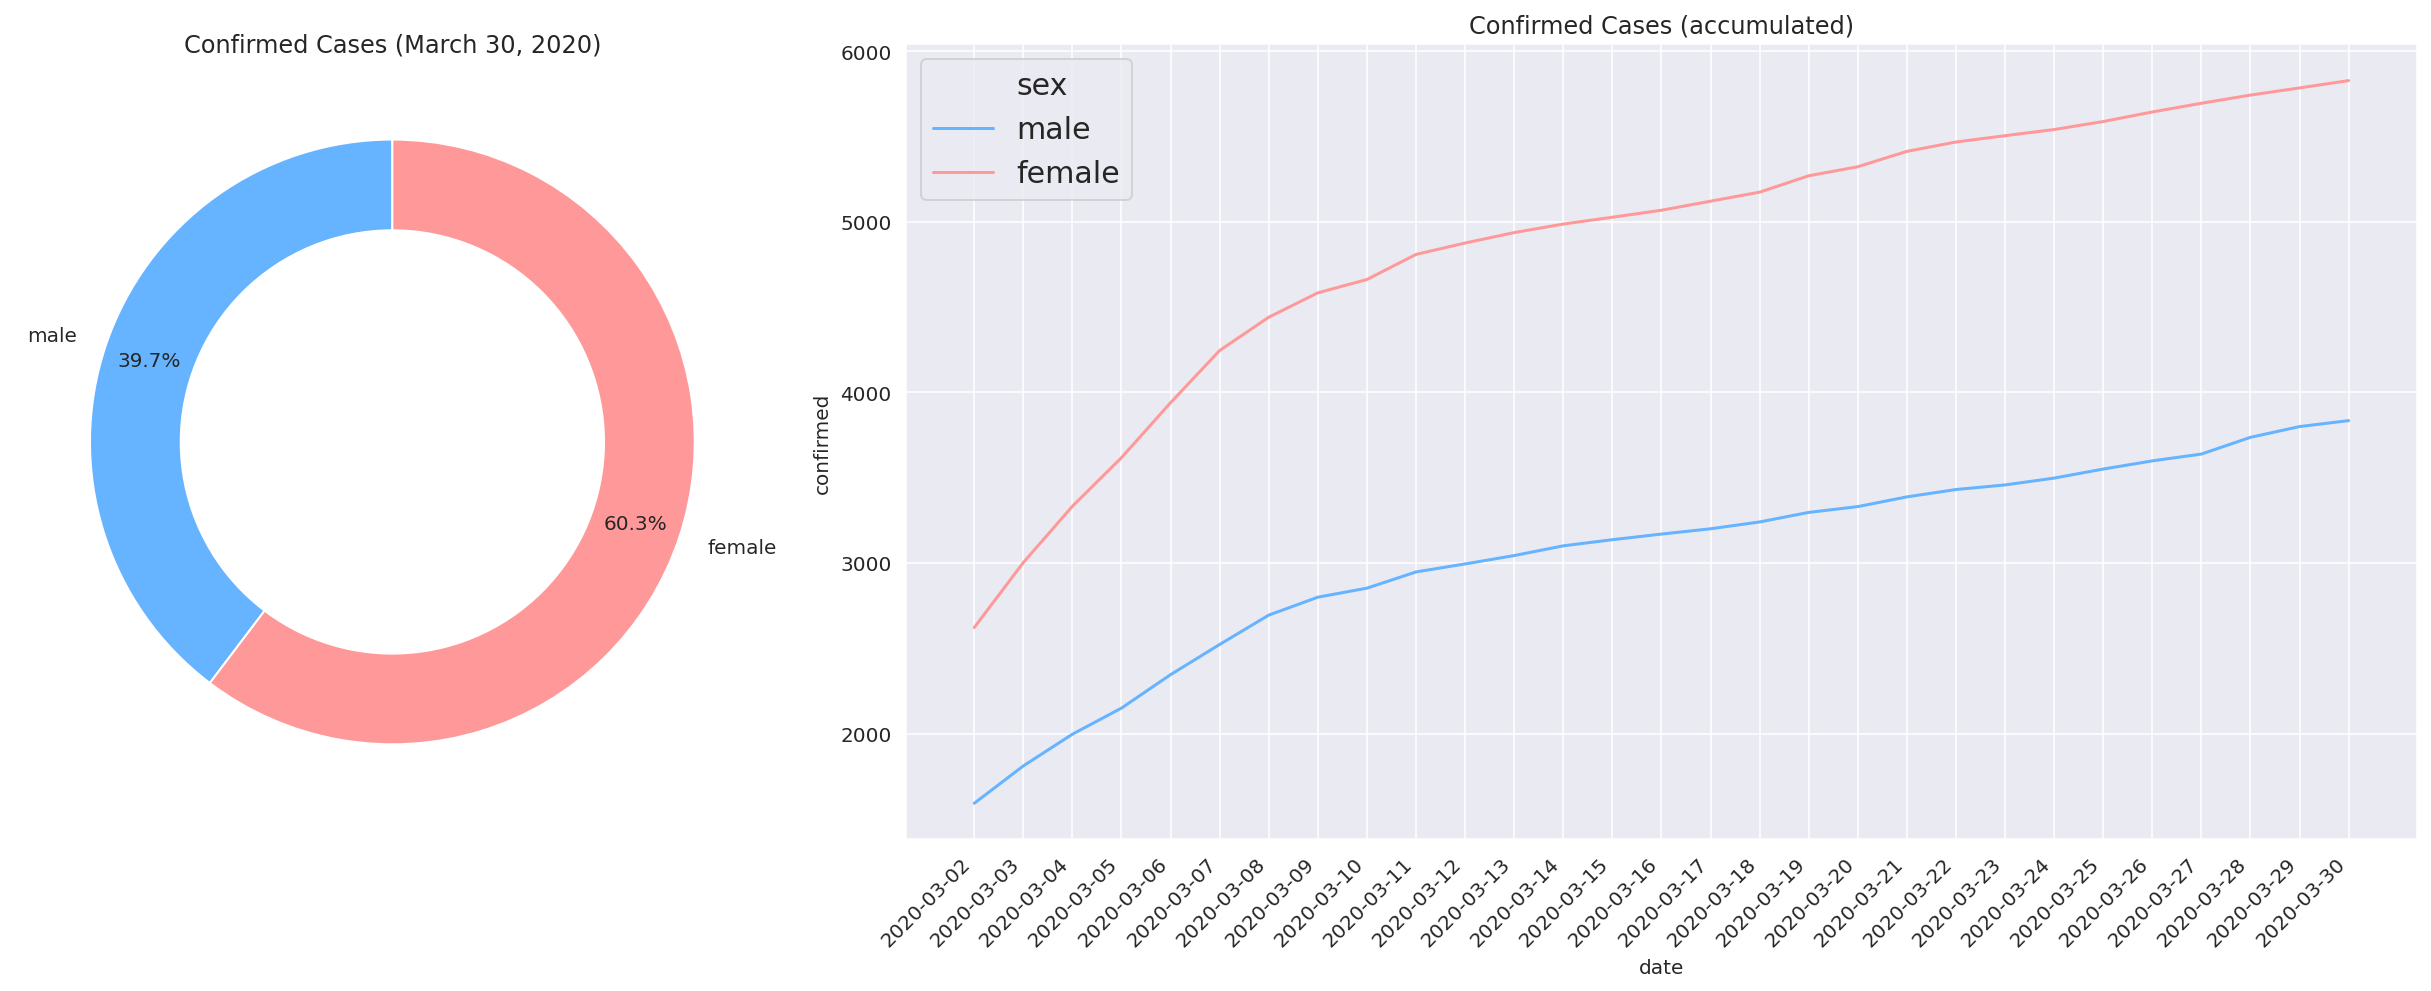

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(17, 7), gridspec_kw={'width_ratios': [1, 2]})
sns.set_palette(['#66b3ff','#ff9999'])

# Donut plot of confirmed cases by gender
ax1.title.set_text('Confirmed Cases (March 30, 2020)')
ax1.pie(gender.confirmed[-2:], labels=['male', 'female'], autopct='%.1f%%',
        startangle=90, pctdistance=0.85)
ax1.add_artist(plt.Circle((0, 0), 0.7, fc='white'))

# Change in time of confirmed cases
ax2.title.set_text('Confirmed Cases (accumulated)')
sns.lineplot(data=gender, x='date', y='confirmed', hue='sex', ax=ax2)
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize='15')

plt.tight_layout()

### **Analysis (Connection between gender & infection)**

## **By Age**

In [61]:
# Age
age = pd.read_csv(os.path.join(DIR_PATH, 'TimeAge.csv'))
print('Unique items: {0}'.format(len(age['age'].unique())))
age.head(9)

Unique items: 9


,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
5,2020-03-02,0,50s,834,5
6,2020-03-02,0,60s,530,6
7,2020-03-02,0,70s,192,6
8,2020-03-02,0,80s,81,3


There are **9 age groups** in this data.

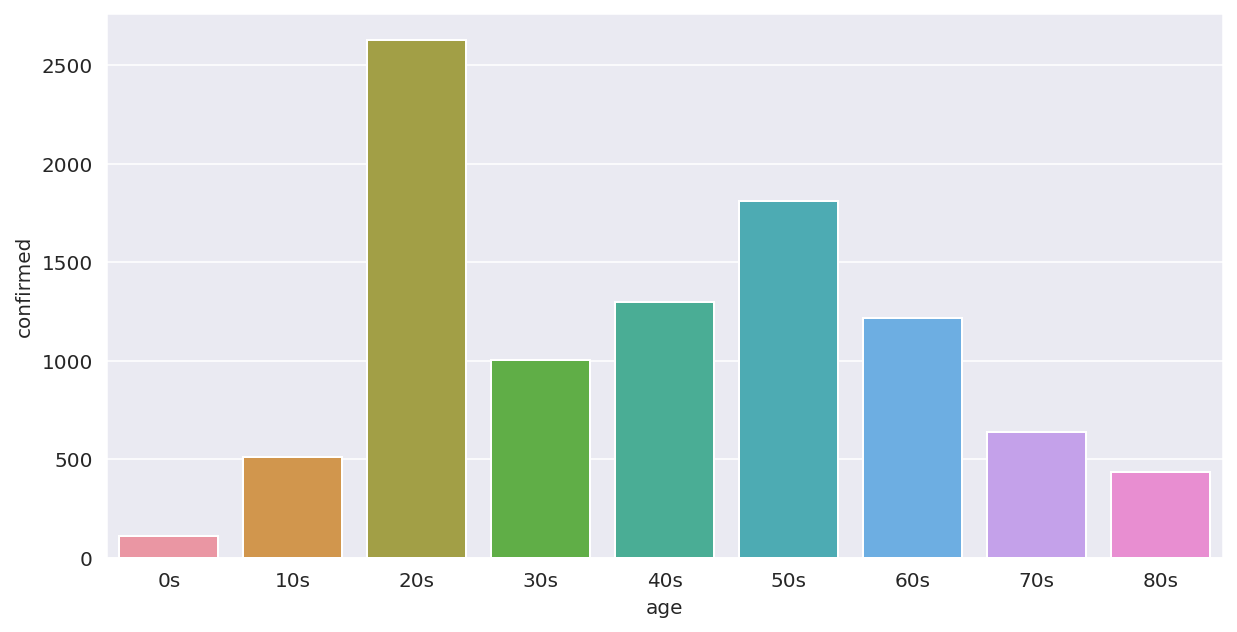

In [62]:
plt.figure(figsize=(10, 5))
sns.barplot(data=age[-9:], x='age', y='confirmed')